# Diffusion Model

In [1]:
from dataset import Dataset
import matplotlib.pyplot as plt
import torch
from torch.optim import Adam
from modules import Unet, Trainer
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
import numpy as np

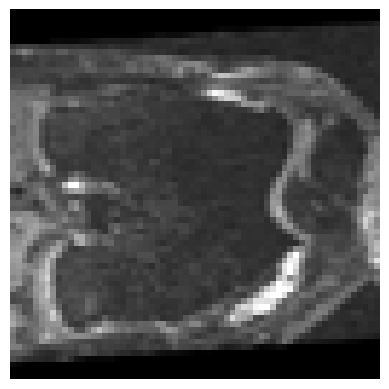

In [2]:
#Create dataset from image folder
ds = Dataset("AKOA_Analysis/", img_size=64)

#test dataset plot for 10 selections of timesteps
plt.axis('off')
image = ds.__getitem__(7)
plt.imshow((image.numpy().T + 1) * 0.5)
plt.show()

Using Device:  cuda


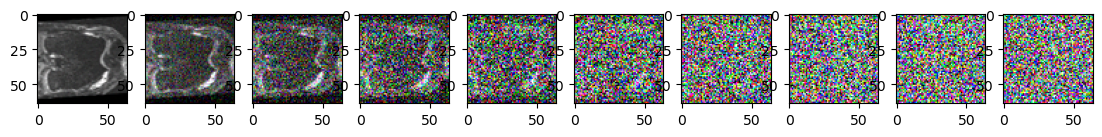

In [3]:
timesteps = 300
img_size = 64

#Create trainer and model
model = Unet()
trainer = Trainer(model, img_size=img_size, timesteps=timesteps, start=0.0001, end=0.02)

#Plot images over timesteps
image = ds.__getitem__(7)
plt.figure(figsize=(15,15))
plt.axis('off')
num_images = 10
stepsize = int(timesteps/num_images)

for idx in range(0, timesteps, stepsize):
    t = torch.Tensor([idx]).type(torch.int64)
    plt.subplot(1, num_images+1, int(idx/stepsize) + 1)
    image, noise = trainer.sample_forward(image, t)
    
    plt.imshow(np.clip((image.cpu().numpy().T + 1) * 0.5, 0, 1))

In [6]:
trainer.load_model("autosave.pth")

Epoch 0 Loss: 0.18056559562683105
Done!
Epoch 1 Loss: 0.17106680572032928
Done!
Epoch 2 Loss: 0.19799694418907166
Done!
Epoch 3 Loss: 0.18590882420539856


KeyboardInterrupt: 

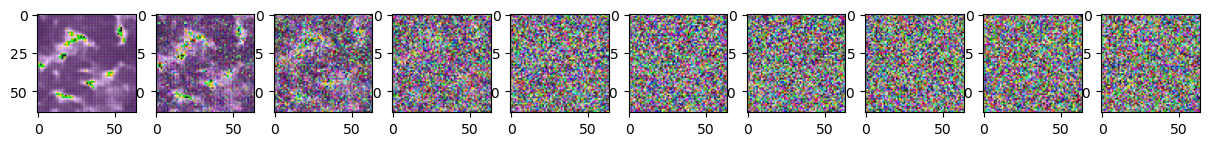

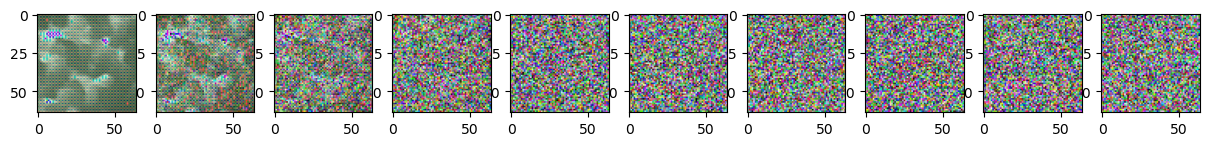

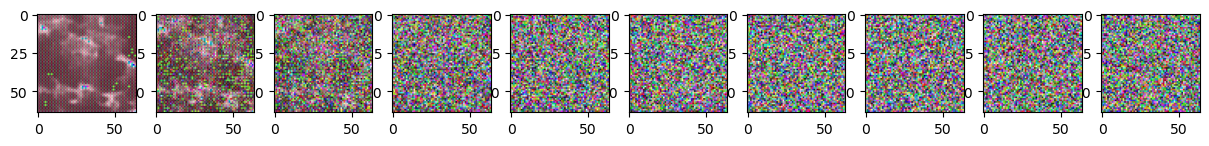

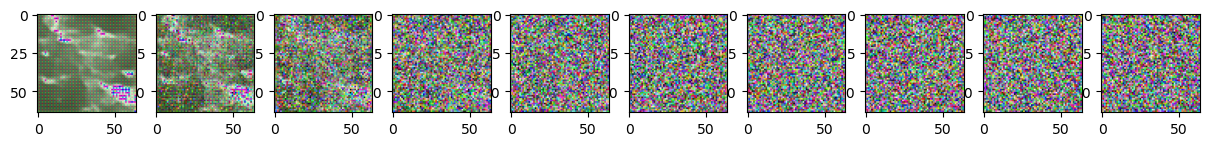

In [7]:
#Create dataloader
batch_size = 128
dataloader = DataLoader(ds, batch_size=batch_size, shuffle=True, drop_last=True)

#Create optimizer
optimizer = Adam(model.parameters(), lr=0.001)

#Train
epochs = 100
trainer.fit(dataloader, epochs, optimizer)